# Predicting Loan Repayment


The dataset for this project is retrieved from kaggle, the home of Data Science.

The major aim of this project is to predict whether the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained.

### **1- Importing Libraries**

In [2]:
# Import the following Libraries
# numpy
# pandas
# matplotlib plotting software
# seaborn 
# Make matplotlib available through all code boxes

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# From Sklearn you'll have to look up from where here. 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Label Encoder, train test split, logisitic regression, confusion_matrix, classification_report,accuracy_score
# DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier,  SVC, GridSearchCV

# Plotly Express
import plotly.express as px



### **2- Getting Data**

In [3]:
# read the data from the csv into a dataframe
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['LoanData.csv']))

Saving LoanData.csv to LoanData.csv


In [4]:
# show the top 4 lines of the dataframe
print(df.head(4))

    Loan_ID Gender Married Dependents Education Self_Employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   
2  LP001031   Male     Yes          2  Graduate            No   
3  LP001035   Male     Yes          2  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  


In [5]:
# show the shape of the dataframe
print(df.shape)

(367, 12)


##### 2-1-Renaming columns

In [6]:
df.columns=df.columns.str.lower()

In [7]:
# rename all the columns as lowercase strings
df.columns=df.columns.str.lower()
print(df.head(4))

    loan_id gender married dependents education self_employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   
2  LP001031   Male     Yes          2  Graduate            No   
3  LP001035   Male     Yes          2  Graduate            No   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   

   credit_history property_area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  


In [8]:
# rename all the columns so that they all have _ in between any column head with two or more words
df.rename(columns = {'applicantincome':'applicant_income', 'coapplicantincome':'coapplicant_income','loanamount':'loan_amount'}, inplace = True)
print(df.columns)

Index(['loan_id', 'gender', 'married', 'dependents', 'education',
       'self_employed', 'applicant_income', 'coapplicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')


##### 2-2-Checking null values

In [9]:
# Check all the columns to see if they have null values (NaN) and sum them
nullCounter = df.isnull().values.sum()
print(nullCounter)

84


we take care of missing values in "loan_amount" and "credit_history".
For other null values, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values. This method is advised only when there are enough samples in the data set. 

In [10]:
# fill the null values in the loan amount column with the mean of the loan amount  column
df['loan_amount']=df['loan_amount'].fillna(df['loan_amount'].mean())   

In [11]:
# fill the null values in the  credit history column with the median of the credit history column
df['credit_history']=df['credit_history'].fillna(df['credit_history'].median())   

In [12]:
df.dropna(axis=0, inplace=True)

# write down what this column does
#It removes the rows that have NaN value
#Instead of creating a new df, it changes the df that you call the method on

In [13]:
# prove there are no more null values in the columns using the same command as above
print(df.isnull().values.any())

False


In [14]:
# show the top 4 lines of the dataframe
print(df.head(4))

    loan_id gender married dependents education self_employed  \
0  LP001015   Male     Yes          0  Graduate            No   
1  LP001022   Male     Yes          1  Graduate            No   
2  LP001031   Male     Yes          2  Graduate            No   
3  LP001035   Male     Yes          2  Graduate            No   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0              5720                   0        110.0             360.0   
1              3076                1500        126.0             360.0   
2              5000                1800        208.0             360.0   
3              2340                2546        100.0             360.0   

   credit_history property_area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             1.0         Urban  


In [15]:
# show the new shape of the dataframe
print(df.shape)

(318, 12)


In [16]:
# show the information/ statistics on this dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 366
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             318 non-null    object 
 1   gender              318 non-null    object 
 2   married             318 non-null    object 
 3   dependents          318 non-null    object 
 4   education           318 non-null    object 
 5   self_employed       318 non-null    object 
 6   applicant_income    318 non-null    int64  
 7   coapplicant_income  318 non-null    int64  
 8   loan_amount         318 non-null    float64
 9   loan_amount_term    318 non-null    float64
 10  credit_history      318 non-null    float64
 11  property_area       318 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 32.3+ KB
None


In [17]:
# get statiscal information on the data frame like count/mean/standard deviation etc
print(df.count())
print(df.mean())
print(df.std())

loan_id               318
gender                318
married               318
dependents            318
education             318
self_employed         318
applicant_income      318
coapplicant_income    318
loan_amount           318
loan_amount_term      318
credit_history        318
property_area         318
dtype: int64
applicant_income      4717.437107
coapplicant_income    1562.845912
loan_amount            136.580284
loan_amount_term       343.685535
credit_history           0.852201
dtype: float64
applicant_income      4907.418483
coapplicant_income    2427.506019
loan_amount             62.591535
loan_amount_term        64.156958
credit_history           0.355460
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


##### 2-3-Label Encoder for Dependents

In [18]:
type(df['dependents'].iloc[0])

#Gets the type of what is at the integer position of 0 in dependents

str

In [19]:
df['dependents'].unique()
#Gets the unique objects in the dependents column

array(['0', '1', '2', '3+'], dtype=object)

In [20]:
model6=LabelEncoder() #Normalize labels

In [21]:
model6.fit(df['dependents'])
#Fit dependents into the model

LabelEncoder()

In [22]:
df['dependents']= model6.transform(df['dependents']) #Changes the dependents into the fitted model

Explain what they are doing in this section

### 3-Exploratory Data Analysis

##### 3-1- Visualization

In [23]:
# get the counts of Loan statuses with "Y" in the column
#NO COLUMN CALLED LOAN STATUSES
Ycounter = 0
for i in df['loan_amount']:
  if i!=0:
    Ycounter+=1
print(Ycounter)

318


In [24]:
# get the counts of Loan statuses with "N" in the column
Ncounter = 0
for i in df['loan_amount']:
  if i==0:
    Ncounter+=1
print(Ncounter)

0


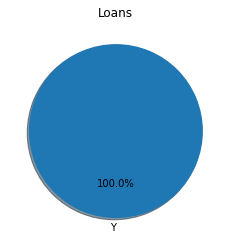

In [25]:
# make a pie plot that shows the distrubution of Yes loans and Y loans
# this plot should have a title, different colors, the percentages inside the sections 


sizes = [100]
plt.pie(sizes, labels = 'Y', autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Loans")
plt.show()


69% of applicants repay the loan and 39% do not repay the loan.

In [26]:
# make six bar charts that create the basica comparisons listed below
# each should have legends, and as different colors as possible.
# Plots 1 and 4 should have y labels and ticks while the rest of them should not


#NO COLUMN CALLED LOAN STATUSES

plt.figure(figsize=(15,10))


<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

Comparison between Genders in getting the Loan shows that a Male Individual has more chance of repaying the Loan.

Comparison between Married Status in getting the Loan shows that a Married Individual has more chance of repaying the Loan.
   
Comparison between Education Status of an Individual in getting the Loan shows that a Graduate Individual has more chance of repaying the Loan.
    
Comparison between Self-Employed or Not in getting the Loan shows that Not Self-Employed has more chance of repaying the Loan.

Comparison between Credit History for getting the Loan shows that an individual with a credit history has more chance of repaying the Loan.
    
Comparison between Property Area for getting the Loan shows that People living in Semi-Urban Area have more chance to repay the Loan.

In [27]:
px.sunburst( data_frame=df,path=['gender','loan_amount'], color='loan_amount')


# try this code to see if it works. Can you fix it

In [ ]:
plt.figure(figsize=(15,10))

# create violin plots that have the six features shown above in the x value and loan amount in the y value
# Plots 1 and 4 should have y labels and ticks while the rest of them should not



In [ ]:
plt.figure(figsize=(18,5))

# Make three subplots that show frequency distributions of applicant incomes, co-applicant incomes and loan amounts
# these should have lines and bars


In [ ]:
px.scatter_3d(data_frame=df,x='applicant_income',y='co-applicant_income',z='loan_amount',color='loan_status')

# try this command and see if it works

##### 3-2-Encoding

###### 3-2-1-gender

In [28]:
model1=LabelEncoder()

In [29]:
model1.fit(df['gender'])

LabelEncoder()

In [30]:
df['gender']= model1.transform(df['gender'])

###### 3-2-2-married

In [31]:
model2=LabelEncoder()

In [32]:
model2.fit(df['married'])

LabelEncoder()

In [33]:
df['married']= model2.transform(df['married'])

###### 3-2-3-education

In [34]:
model3=LabelEncoder()

In [35]:
model3.fit(df['education'])

LabelEncoder()

In [36]:
df['education']= model3.transform(df['education'])

###### 3-2-4-self_employed

In [37]:
model4=LabelEncoder()

In [ ]:
model4.fit(df['self_employed'])

In [39]:
df['self_employed']= model4.transform(df['self_employed'])

###### 3-2-5-property_area

In [40]:
model5=LabelEncoder()

In [41]:
model5.fit(df['property_area'])

LabelEncoder()

In [42]:
df['property_area']= model5.transform(df['property_area'])

###### 3-2-6-loan status

In [43]:
model6=LabelEncoder()

In [45]:
model6.fit(df['loan_status'])

KeyError: ignored

In [ ]:
df['loan_status']= model6.transform(df['loan_status'])

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(12,8))

corr = df.corr()  #L1
mask = np.zeros_like(corr) #L2
mask[np.triu_indices_from(mask)] = True #L3
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True,annot=True,linewidths=2, cmap='viridis')
plt.title('Correlation Matrix for Loan Status')

Explain what the encoder does here

Explain what this plot would do if it did not include L1, L2, L3

From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

### 4-Prediction

##### 4-1-LogisticRegression

In [ ]:
# Set a variable equal to the dataframe that has dropped the columns loan_id, and loan_status
# Hint: might want to control axis
# set 2nd variable equal to the dataframe with a singular feature loan status

In [ ]:
# Perform a train test split

In [ ]:
# set a variable equal to a logistic regression model

In [ ]:
# fit your model to the training set

In [ ]:
# set a variable to the logistic regression prediction of the test set
# basically if your variables were X and y the use logistic regression to predict X-test


In [ ]:
print(confusion_matrix(y_test,lr_prediction))

# Explain confusion matrix


print('\n')
print(classification_report(y_test,lr_prediction))

# Explain classification report

print('\n')
print('Logistic Regression accuracy: ', accuracy_score(y_test,lr_prediction))

# Do you feel like this is an accurate model?

# 4-2-More models

### Decision Tree Classifier

In [ ]:
# Use this Decision Tree Classifier Model to complete the same thing on 

# Random Forest Classifier
# K Nearest Neighbors
# SVC


In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_prediction=dt.predict(X_test)

In [ ]:
# Confusion Matrix and Model Accuracy

print(confusion_matrix(y_test,dt_prediction))
print('\n')
print(classification_report(y_test,dt_prediction))
print('\n')
print('Decision Tree Accuracy: ', accuracy_score(y_test,dt_prediction))

[[14 17]
 [15 63]]


              precision    recall  f1-score   support

           0       0.48      0.45      0.47        31
           1       0.79      0.81      0.80        78

    accuracy                           0.71       109
   macro avg       0.64      0.63      0.63       109
weighted avg       0.70      0.71      0.70       109



Decision Tree Accuracy:  0.7064220183486238


##### 4-3-Random Forest

In [ ]:
# Box for model


In [ ]:
# Box for fit



In [ ]:
# Box for prediction




In [ ]:
# Box for Confusion Matrix and Model Accuracy



##### 4-4-KNearest Neighbors

In [ ]:
error_rate=[]
for n in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn_prediction=knn.predict(X_test)
    error_rate.append(np.mean(knn_prediction!=y_test))
print(error_rate)

[0.3853211009174312, 0.48623853211009177, 0.4036697247706422, 0.44954128440366975, 0.43119266055045874, 0.45871559633027525, 0.3486238532110092, 0.3669724770642202, 0.3302752293577982, 0.3302752293577982, 0.3119266055045872, 0.3394495412844037, 0.29357798165137616, 0.30275229357798167, 0.29357798165137616, 0.3119266055045872, 0.3211009174311927, 0.29357798165137616, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.27522935779816515, 0.26605504587155965, 0.26605504587155965, 0.27522935779816515, 0.27522935779816515, 0.28440366972477066, 0.27522935779816515, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066, 0.28440366972477066]


In [ ]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,40)),error_rate,color='b', marker='o', linewidth=2, markersize=12, markerfacecolor='r', markeredgecolor='r')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error Rate')
plt.title('Elbow Method')

In [ ]:
# Run the above two boxes to get the number of necessary nearest neighbors
# Please look up what would tell you what number to use from this 

In [ ]:
# Get Number from above cells

knn=KNeighborsClassifier(n_neighbors=?)

In [ ]:
# Box for fitting 


In [ ]:
# Box for predictions


In [ ]:
# Box for Confusion Matrix and Model Accuracy



##### 4-5-SVC

In [ ]:
# Box for model



In [ ]:
# Box for fitting 



In [ ]:
# Box for predicting


In [ ]:
# Box for Confusion Matrix and Model Accuracy

In [ ]:
# Using the example for logistic regression please print the accuracy scores for the 5 models you used.
# Please Let me know you conclusions in the last box. 
# one about the data
# the second about which model is best

print('Logistic Regression Accuracy: ', accuracy_score(y_test,lr_prediction))


### CONCLUSION

1. Tell me what you learned from the data

2. Which model is best and why?: